# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [207]:
#!pip install palmerpenguins

In [208]:
#!pip install sklearn

In [209]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_light, labs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from palmerpenguins import load_penguins
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_line, geom_abline, theme_minimal,theme_light, labs


In [210]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [211]:
penguins = penguins.dropna()
X = penguins.drop(['species'], axis = 1)
y = penguins['species']

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# KNN Models

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

knn_model3 = Pipeline(steps=[("ct", ct), ("knn", KNeighborsClassifier(n_neighbors=3))])

knn_model3.fit(X_train, y_train)

# making predictions with testing data
knn_model3_y_pred_test = knn_model3.predict(X_test)

In [213]:
knn_model7 = Pipeline(steps=[("ct", ct), ("knn", KNeighborsClassifier(n_neighbors=70))])

knn_model7.fit(X_train, y_train)

# making predictions with testing data
knn_model7_y_pred_test = knn_model7.predict(X_test)

## Confusion matrix

In [214]:
# Generate confusion matrix for KNN Model 3
conf_matrix = confusion_matrix(y_test, knn_model3_y_pred_test)
print(conf_matrix)

[[35  1  0]
 [ 0 24  0]
 [ 0  0 24]]


In [215]:
# Generate confusion matrix for KNN Model 7
conf_matrix = confusion_matrix(y_test, knn_model7_y_pred_test)
print(conf_matrix)

[[36  0  0]
 [15  9  0]
 [ 0  0 24]]


## Overall Accuracy

In [216]:
# finding the training accuracy
training_accuracy = accuracy_score(y_test, knn_model3_y_pred_test)
training_accuracy

0.9880952380952381

In [217]:
# finding the training accuracy
training_accuracy = accuracy_score(y_test, knn_model7_y_pred_test)
training_accuracy

0.8214285714285714

## Precision, Recall, AUC, and F1-score for each species

In [218]:
recall_scores = classification_report(y_test, knn_model3_y_pred_test, output_dict=True)
recall_scores_df_1 = pd.DataFrame(recall_scores)
recall_scores_df_1

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.000000,0.960000,1.0,0.988095,0.986667,0.988571
recall,0.972222,1.000000,1.0,0.988095,0.990741,0.988095
f1-score,0.985915,0.979592,1.0,0.988095,0.988502,0.988133
support,36.000000,24.000000,24.0,0.988095,84.000000,84.000000


In [219]:
y_probs = knn_model3.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')

print(f"The AUC score for the model is: {auc_score}")

The AUC score for the model is: 0.9997878086419753


In [220]:
recall_scores = classification_report(y_test, knn_model7_y_pred_test, output_dict=True)
recall_scores_df_2 = pd.DataFrame(recall_scores)
recall_scores_df_2

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.705882,1.000000,1.0,0.821429,0.901961,0.873950
recall,1.000000,0.375000,1.0,0.821429,0.791667,0.821429
f1-score,0.827586,0.545455,1.0,0.821429,0.791014,0.796238
support,36.000000,24.000000,24.0,0.821429,84.000000,84.000000


In [221]:
y_probs = knn_model7.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')

print(f"The AUC score for the model is: {auc_score}")

The AUC score for the model is: 0.9990547839506173


# Decision Tree Models

In [222]:
# Create the Decision Tree model pipeline
dt_model3 = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 3))
])

# Fit the pipeline to the training data
dt_model3.fit(X_train, y_train)

# making predictions with testing data
dt_model3_y_pred_test = dt_model3.predict(X_test)

In [223]:
# Create the Decision Tree model pipeline
dt_model7 = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 70, random_state=42))
])

# Fit the pipeline to the training data
dt_model7.fit(X_train, y_train)

# making predictions with testing data
dt_model7_y_pred_test = dt_model7.predict(X_test)

## Confusion Matrices

In [224]:
# Generate confusion matrix for Decision Tree Model 3
conf_matrix = confusion_matrix(y_test, dt_model3_y_pred_test)
print(conf_matrix)

[[36  0  0]
 [ 3 21  0]
 [ 0  0 24]]


In [225]:
# Generate confusion matrix for Decision Tree Model 7
conf_matrix = confusion_matrix(y_test, dt_model7_y_pred_test)
print(conf_matrix)

[[35  0  1]
 [ 0 24  0]
 [ 0  0 24]]


## Overall Accuracy

In [226]:
# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model3_y_pred_test)
training_accuracy

0.9642857142857143

In [227]:
# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model7_y_pred_test)
training_accuracy

0.9880952380952381

## Precision, Recall, AUC, and F1-score for each species

In [228]:
recall_scores = classification_report(y_test, dt_model3_y_pred_test, output_dict=True)
recall_scores_df_3 = pd.DataFrame(recall_scores)
recall_scores_df_3

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.923077,1.000000,1.0,0.964286,0.974359,0.967033
recall,1.000000,0.875000,1.0,0.964286,0.958333,0.964286
f1-score,0.960000,0.933333,1.0,0.964286,0.964444,0.963810
support,36.000000,24.000000,24.0,0.964286,84.000000,84.000000


In [229]:
recall_scores = classification_report(y_test, dt_model7_y_pred_test, output_dict=True)
recall_scores_df_4 = pd.DataFrame(recall_scores)
recall_scores_df_4

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,1.000000,1.0,0.960000,0.988095,0.986667,0.988571
recall,0.972222,1.0,1.000000,0.988095,0.990741,0.988095
f1-score,0.985915,1.0,0.979592,0.988095,0.988502,0.988133
support,36.000000,24.0,24.000000,0.988095,84.000000,84.000000


In [230]:
y_probs = dt_model3.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')

print(f"The AUC score for the model is: {auc_score}")

The AUC score for the model is: 0.9812307098765433


In [231]:
y_probs = dt_model7.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')

print(f"The AUC score for the model is: {auc_score}")

The AUC score for the model is: 0.9925925925925926


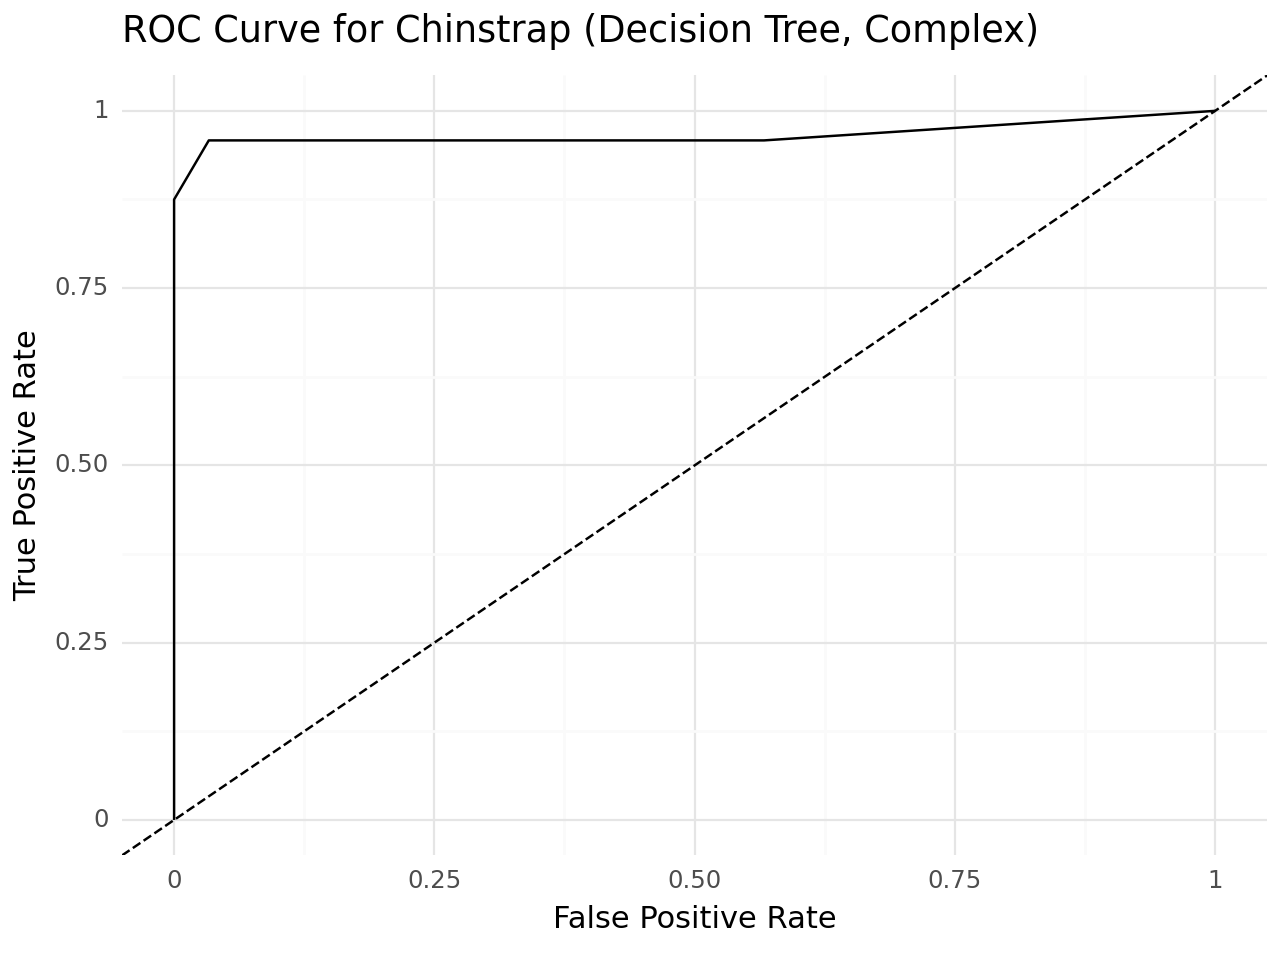

<Figure Size: (640 x 480)>

In [232]:
class_names = ['Adelie','Chinstrap', 'Gentoo']
# Binarize y_test for 'Gentoo' class
y_test_binarized_chinstrap = label_binarize(y_test, classes=class_names)[:, class_names.index('Chinstrap')]

# Predict probabilities for the 'Gentoo' class
y_test_pred_proba_chinstrap = dt_model3.predict_proba(X_test)[:, class_names.index('Chinstrap')]


# Calculate ROC curve metrics for 'Gentoo' class
fpr_chinstrap, tpr_chinstrap, thresholds_chinstrap = roc_curve(y_test_binarized_chinstrap, y_test_pred_proba_chinstrap)

# Convert to DataFrame for plotting
roc_data_chinstrap = pd.DataFrame({
    'False Positive Rate': fpr_chinstrap,
    'True Positive Rate': tpr_chinstrap
})

# Create ROC plot using plotnine
roc_plot_chinstrap = (
    ggplot(roc_data_chinstrap, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line()
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Chinstrap (Decision Tree, Complex)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

roc_plot_chinstrap

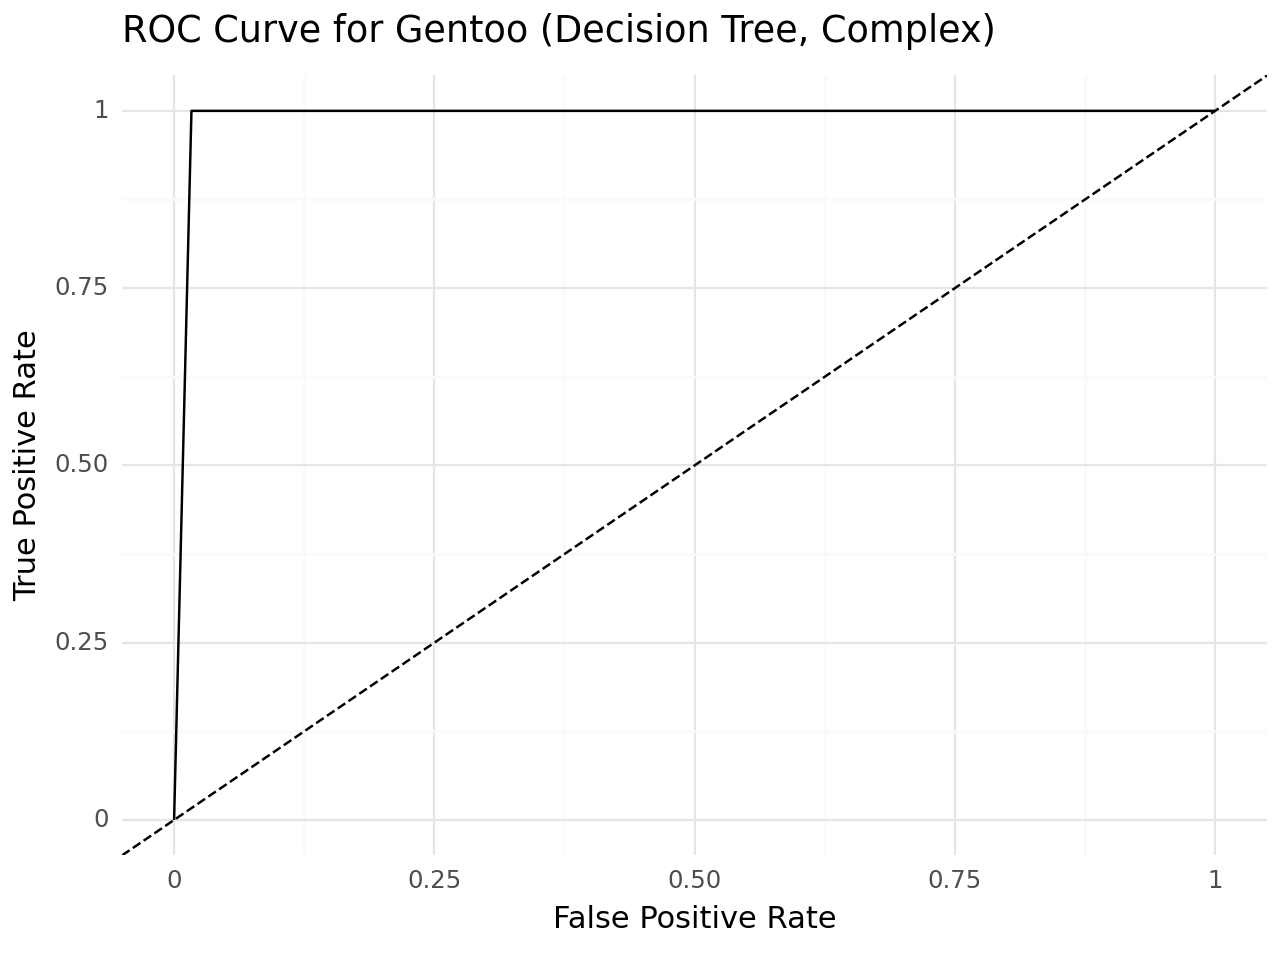

<Figure Size: (640 x 480)>

In [233]:
class_names = ['Adelie','Chinstrap', 'Gentoo']
# Binarize y_test for 'Gentoo' class
y_test_binarized_gentoo = label_binarize(y_test, classes=class_names)[:, class_names.index('Gentoo')]

# Predict probabilities for the 'Gentoo' class
y_test_pred_proba_gentoo = dt_model7.predict_proba(X_test)[:, class_names.index('Gentoo')]


# Calculate ROC curve metrics for 'Gentoo' class
fpr_gentoo, tpr_gentoo, thresholds_gentoo = roc_curve(y_test_binarized_gentoo, y_test_pred_proba_gentoo)

# Convert to DataFrame for plotting
roc_data_gentoo = pd.DataFrame({
    'False Positive Rate': fpr_gentoo,
    'True Positive Rate': tpr_gentoo
})

# Create ROC plot using plotnine
roc_plot_gentoo = (
    ggplot(roc_data_gentoo, aes(x='False Positive Rate', y='True Positive Rate'))
    + geom_line()
    + geom_abline(linetype='dashed')
    + labs(title='ROC Curve for Gentoo (Decision Tree, Complex)', x='False Positive Rate', y='True Positive Rate')
    + theme_minimal()
)

roc_plot_gentoo